In [1]:
import sys; sys.path.append('..')
from osp import *
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 10

In [130]:
newtext= """By a `denoting phrase' I mean a phrase such as any one of the following: a man, some man, any man, every man, all men, the present King of England, the presenting King of France, the center of mass of the solar system at the first instant of the twentieth century, the revolution of the earth round the sun, the revolution of the sun round the earth. Thus a phrase is denoting solely in virtue of its form. We may distinguish three cases: (1) A phrase may be denoting, and yet not denote anything; e.g., `the present King of France'. (2) A phrase may denote one definite object; e.g., `the present King of England' denotes a certain man. (3) A phrase may denote ambiguously; e.g. `a man' denotes not many men, but an ambiguous man. The interpretation of such phrases is a matter of considerably difficulty; indeed, it is very hard to frame any theory not susceptible of formal refutation. All the difficulties with which I am acquainted are met, so far as I can discover, by the theory which I am about to explain.
The subject of denoting is of very great importance, not only in logic and mathematics, but also in the theory of knowledge. For example, we know that the center of mass of the solar system at a definite instant is some definite point, and we can affirm a number of propositions about it; but we have no immediate acquaintance with this point, which is only known to us by description. The distinction between acquaintance and knowledge about is the distinction between the things we have presentations of, and the things we only reach by means of denoting phrases. It often happens that we know that a certain phrase denotes unambiguously, although we have no acquaintance with what it denotes; this occurs in the above case of the center of mass. In perception we have acquaintance with objects of perception, and in thought we have acquaintance with objects of a more abstract logical character; but we do not necessarily have acquaintance with the objects denoted by phrases composed of words with whose meanings we are acquainted. To take a very important instance: there seems no reason to believe that we are ever acquainted with other people's minds, seeing that these are not directly perceived; hence what we know about them is obtained through denoting. All thinking has to start from acquaintance; but it succeeds in thinking about many things with which we have no acquaintance.

The course of my argument will be as follows. I shall begin by stating the theory I intend to advocate; I shall then discuss the theories of Frege and Meinong, showing why neither of them satisfies me; then I shall give the grounds in favor of my theory; and finally I shall briefly indicate the philosophical consequences of my theory.

My theory, briefly, is as follows. I take the notion of the variable as fundamental; I use `C(x)' to mean a proposition in which x is a constituent, where x, the variable, is essentially and wholly undetermined. Then we can consider the two notions `C(x) is always true' and `C(x) is sometimes true'. Then everything and nothing and something (which are the most primitive of denoting phrases) are to be interpreted as follows:
C(everything) means `C(x) is always true';
C(nothing) means ` ``C(x) is false'' is always true';
C(something) means `It is false that ``C(x) is false'' is always true.'

Here the notion `C(x) is always true' is taken as ultimate and indefinable, and the others are defined by means of it. Everything, nothing, and something are not assumed to have any meaning in isolation, but a meaning is assigned to every proposition in which they occur. This is the principle of the theory of denoting I wish to advocate: that denoting phrases never have any meaning in themselves, but that every proposition in whose verbal expression they occur has a meaning. The difficulties concerning denoting are, I believe, all the result of a wrong analysis of propositions whose verbal expressions contain denoting phrases. The proper analysis, if I am not mistaken, may be further set forth as follows.

Suppose now we wish to interpret the proposition, `I met a man'. If this is true, I met some definite man; but that is not what I affirm. What I affirm is, according to the theory I advocate:

` ``I met x, and x is human'' is not always false'.
Generally, defining the class of men as the class of objects having the predicate human, we say that:
`C(a man)' means ` ``C(x) and x is human'' is not always false'.
This leaves `a man', by itself, wholly destitute of meaning, but gives a meaning to every proposition in whose verbal expression `a man' occurs.
Consider next the proposition `all men are mortal'. This proposition is really hypothetical and states that if anything is a man, it is mortal. That is, it states that if x is a man, x is mortal, whatever x may be. Hence, substituting `x is human' for `x is a man', we find:"""

# newtext = """
# What are generative texts and how should we approach them as critics? Are they worth our admiration, study, use, or contempt? Increasingly referred to as “slop”—“a term of art, akin to spam, for low-rent, scammy garbage generated by artificial intelligence and increasingly prevalent across the internet”—AI-generated texts and images elicit for many a sense of embarrassment, disappointment, even disgust. The rise of “slop” as a critical term would seem to constitute a new aesthetic category for AI-generated cultural production, one akin in many ways to that of the gimmick as theorized by Sianne Ngai. For Ngai, contradictory feelings of technological wonder and aesthetic revulsion are symptomatic of the gimmick, a “labor-saving device” translating “the reduction of socially necessary labor through progressively advanced machines and techniques of production into a sign of impoverishment in the aesthetic realm”. Published five years before ChatGPT was released to the public in late 2022, and without referencing artificial intelligence, Ngai’s theory of the gimmick might well describe the fascination, repulsion, and aesthetic disappointment provoked by generative AI. At the same time, AI slop arises from still more advanced machines and techniques of production than the gimmick’s mechanical doohickeys of the nineteenth and twentieth centuries. This new aesthetic category and the cultural production it describes therefore demand a new critical framework and new modes of investigation.
# """

doc = get_nlp_doc(newtext)

In [131]:
df_new_preds, df_new_feats = get_new_preds_feats(doc)

In [132]:
df_new_feats.feat_name

0                                height
1        num_words_in_dependent_clauses
2      num_words_in_independent_clauses
3               num_independent_clauses
4                 num_dependent_clauses
                     ...               
383                                 SYM
384                              orphan
385                            goeswith
386                                 AFX
387                                  GW
Name: feat_name, Length: 388, dtype: object

In [133]:
df_new_preds.mean(numeric_only=True)

run                4.500000
prob_Literature    0.004634
prob_Philosophy    0.995366
dtype: float64

In [134]:
len([w for sent in doc.sentences for w in sent.words])

1047

In [160]:
figdf = (
    df_new_feats.groupby(["feature", "feat_type", "feat_name"])
    .mean(numeric_only=True)
    .reset_index()
)
# figdf = figdf.query("score_mean3>1 & score_mean1>1")

figld = []
for i,row in figdf.iterrows():
    if row['feat_name'].startswith('num_words_in') or row['feat_name']=='height':
        row['score_mean1'] = row['score_mean1'] / 10
        row['score_mean2'] = row['score_mean2'] / 10
        row['score_mean3'] = row['score_mean3'] / 10
        
    for grp in [1,2]:
        d = {
            'feature':row['feature'],
            'feat_type':row['feat_type'],
            'feat_name':row['feat_name'],
            'target':('Philosophy' if grp == 1 else 'Literature'),
            'score_mean1':row[f'score_mean{grp}'],
            'score_mean2':row['score_mean3'],
        }
        if d['score_mean1'] > 1 and d['score_mean2'] > 1:
            figld.append(d)
figdf = pd.DataFrame(figld)
figdf['odds_ratio'] = figdf['score_mean2'] / figdf['score_mean1']
figdf['odds_ratio_log'] = np.log(figdf['odds_ratio'])

def label_feat(row):
    ratio = row["odds_ratio"]
    if ratio < 1:
        ratio = f'-{1/ratio:.1f}x'
    else:
        ratio = f'{ratio:.1f}x'

    feat_name = row["feat_name"].replace("num_","# ").replace("_"," ")
    feat_name = feat_name.replace('independent clause','IC')
    feat_name = feat_name.replace('dependent clause','DC')
    return f'{feat_name}\n({ratio})'

figdf['feat_label'] = figdf.apply(label_feat, axis=1)
figdf

,feature,feat_type,feat_name,target,score_mean1,score_mean2,odds_ratio,odds_ratio_log,feat_label
0,deprel_acl,deprel,acl,Philosophy,11.200401,7.662835,0.684157,-0.379568,acl\n(-1.5x)
1,deprel_acl,deprel,acl,Literature,9.107505,7.662835,0.841376,-0.172717,acl\n(-1.2x)
2,deprel_acl:relcl,deprel,acl:relcl,Philosophy,14.056830,18.199234,1.294690,0.258271,acl:relcl\n(1.3x)
3,deprel_acl:relcl,deprel,acl:relcl,Literature,12.588054,18.199234,1.445754,0.368631,acl:relcl\n(1.4x)
4,deprel_advcl,deprel,advcl,Philosophy,19.232833,16.283525,0.846652,-0.166465,advcl\n(-1.2x)
...,...,...,...,...,...,...,...,...,...
127,sent_num_independent_clauses,sent,num_independent_clauses,Literature,58.280006,85.951469,1.474802,0.388524,# ICs\n(1.5x)
128,sent_num_words_in_dependent_clauses,sent,num_words_in_dependent_clauses,Philosophy,63.491390,42.241379,0.665309,-0.407504,# words in DCs\n(-1.5x)
129,sent_num_words_in_dependent_clauses,sent,num_words_in_dependent_clauses,Literature,47.431876,42.241379,0.890569,-0.115894,# words in DCs\n(-1.1x)
130,sent_num_words_in_independent_clauses,sent,num_words_in_independent_clauses,Philosophy,37.253725,57.758621,1.550412,0.438521,# words in ICs\n(1.6x)


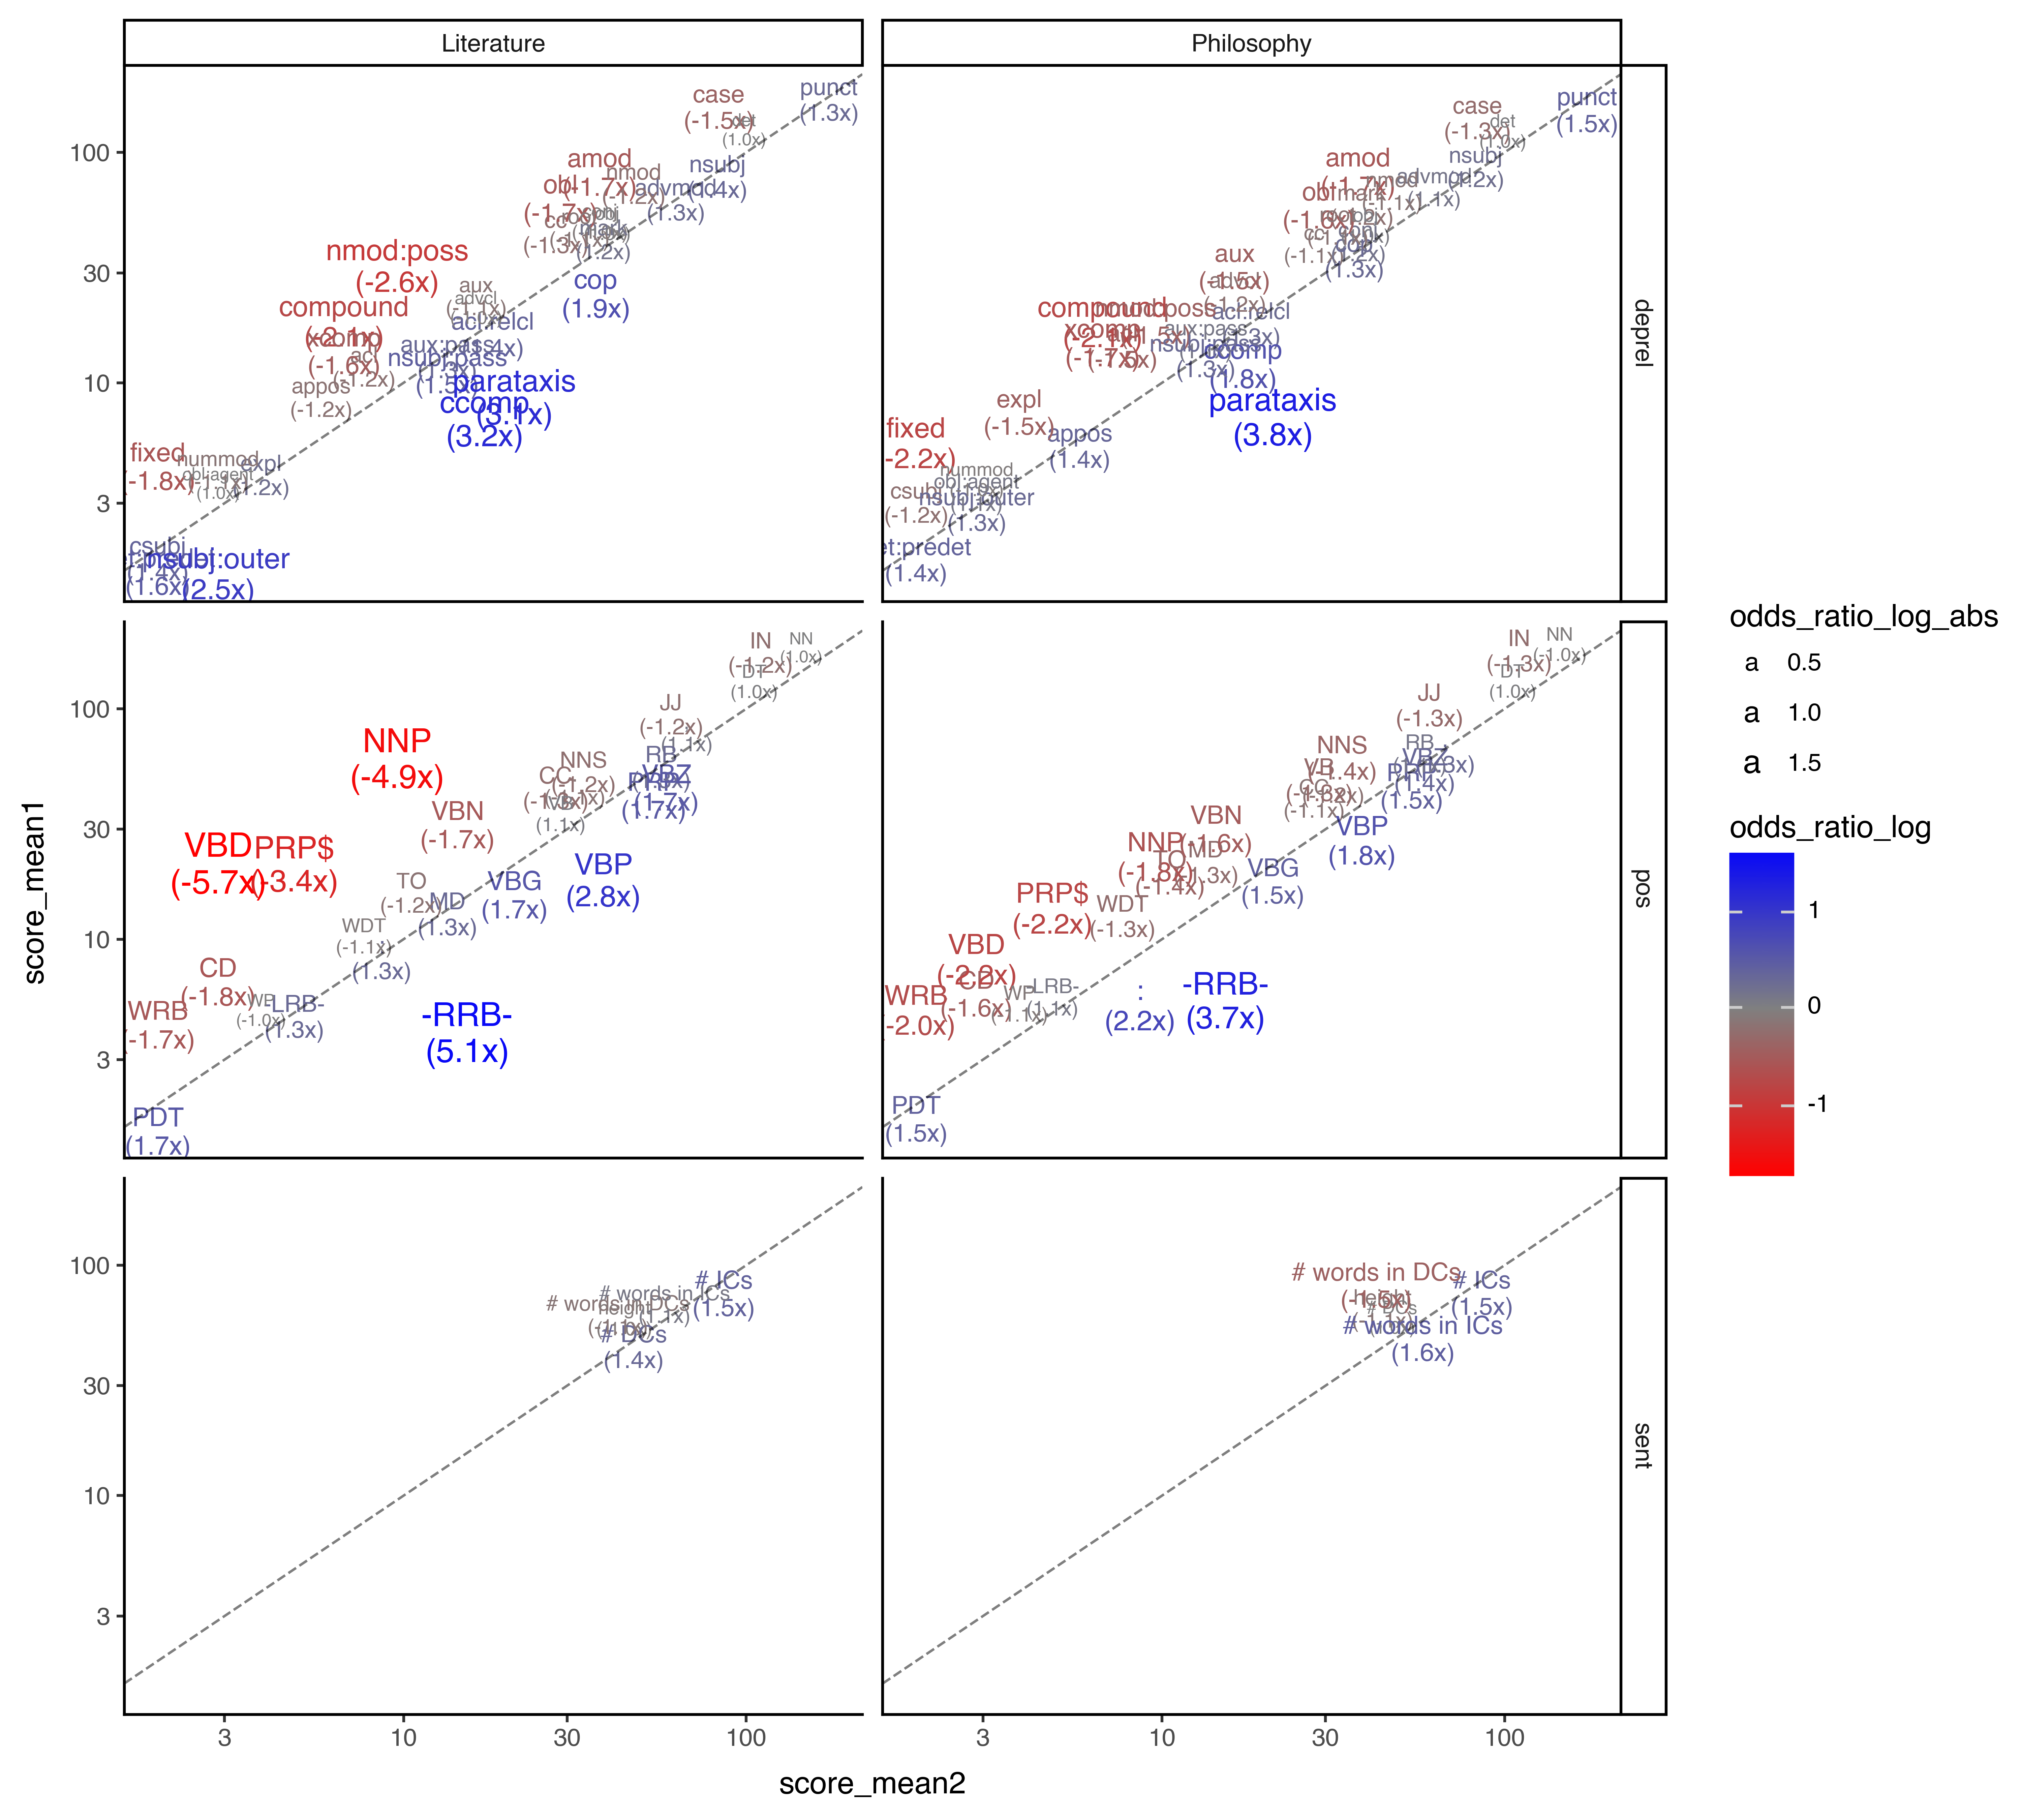

In [166]:
figdf['odds_ratio_log_r'] = figdf['odds_ratio_log'] * -1
figdf['odds_ratio_log_abs'] = figdf['odds_ratio_log'].abs()
fig = p9.ggplot(figdf, p9.aes(x='score_mean2', y='score_mean1',label='feat_label',color='odds_ratio_log', size='odds_ratio_log_abs', shape='target'))
# fig += p9.geom_point(alpha=0.5, size=2)
fig += p9.geom_text(nudge_y=0.1)
fig += p9.scale_x_log10()
fig += p9.scale_y_log10()
fig += p9.geom_abline(slope=1, intercept=0, linetype='dashed', alpha=0.5)
# fig += p9.facet_wrap('feat_type',ncol=2)
fig += p9.facet_grid('feat_type~target')
fig += p9.theme_classic()
fig += p9.theme(figure_size=(10,9))
fig += p9.scale_size_continuous(range=(6,12))
# fig += p9.scale_color_distiller(type='div',palette='RdBu',midpoint=0)
fig += p9.scale_color_gradient2(low='red', mid='gray', high='blue', midpoint=0)

fig

In [56]:
stopp

NameError: name 'stopp' is not defined

In [9]:
df_new_feats.groupby('feature').mean(numeric_only=True)[['weight','score_mean1','score_mean2','score_mean3','score_mean_div_3-1','score_mean_div_3-2']].sort_values('score_mean_div_3-2',ascending=True).sample(5)

,weight,score_mean1,score_mean2,score_mean3,score_mean_div_3-1,score_mean_div_3-2
feature,,,,,,
deprel_expl,-0.076533,5.746964,3.089669,4.385965,0.764007,1.463939
pos_FW,0.614853,0.853004,0.260762,13.157895,15.666947,59.372368
sent_num_words_in_independent_clauses,0.007595,374.365766,526.388508,934.210526,2.508512,1.777253
deprel_csubj,-0.104341,2.359387,1.337220,4.385965,1.881202,3.298811
pos_JJS,-0.080529,1.355949,1.368312,0.000000,0.000000,0.000000


In [10]:
df_new_preds.mean(numeric_only=True)

run      4.50000
prob1    0.22055
prob2    0.77945
dtype: float64

In [11]:
df_preds

,true_label,pred_label,prob1,prob2,test_label,confidence,correct,accuracy,support,run,predict_type,prob_Literature,prob_Philosophy,comparison
id,,,,,,,,,,,,,,
lit/3716491__04,Literature,Philosophy,0.49144014963593696,0.508559850364063,Literature / Philosophy,0.508559850364063,0,0.9145,2000.0,0,cv,nan,nan,1925-1950 Philosophy vs 1925-1950 Literature
lit/2871701__01,Literature,Literature,0.9991263267257862,0.000873673274213794,Literature / Philosophy,0.9991263267257862,1,0.9145,2000.0,0,cv,nan,nan,1925-1950 Philosophy vs 1925-1950 Literature
lit/457453__01,Literature,Literature,0.9974224957261134,0.0025775042738865593,Literature / Philosophy,0.9974224957261134,1,0.9145,2000.0,0,cv,nan,nan,1925-1950 Philosophy vs 1925-1950 Literature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phil/10.2307/2953730__03,Philosophy,prob_Philosophy,nan,nan,Literature / Philosophy,nan,0,nan,nan,9,unseen,0.012841101948878997,0.987158898051121,2000-2025 Philosophy vs 2000-2025 Literature
lit/468421__06,Literature,prob_Philosophy,nan,nan,Literature / Philosophy,nan,0,nan,nan,9,unseen,0.1272485323519187,0.8727514676480813,2000-2025 Philosophy vs 2000-2025 Literature
phil/10.2307/2185617__06,Philosophy,prob_Philosophy,nan,nan,Literature / Philosophy,nan,0,nan,nan,9,unseen,0.3808832762297668,0.6191167237702332,2000-2025 Philosophy vs 2000-2025 Literature
